# Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

# Import Data

In [2]:
data = pd.read_csv('data/data_for_ml_v3_fixed.csv', index_col=[2], parse_dates=[0,1,2])

In [3]:
data.head()

,date,time,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,...,is_exam_period,academic_calendar,weather_condition,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204,count_0412,count_1211
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-01-01 07:00:00,2019-01-01,2020-04-23 07:00:00,3,7,1,1,1,1,1,NO,...,NORMAL,HOLIDAY,Fair,-3.350046,0.568932,-0.656475,2.792734,0,0,0
2019-01-01 08:00:00,2019-01-01,2020-04-23 08:00:00,3,8,1,1,1,1,1,NO,...,NORMAL,HOLIDAY,Fair,-3.350046,0.568932,-0.117539,3.102625,0,0,0
2019-01-01 09:00:00,2019-01-01,2020-04-23 09:00:00,3,9,1,1,1,1,1,NO,...,NORMAL,HOLIDAY,Fair,-2.797979,0.290936,-0.387007,3.102625,0,0,0
2019-01-01 10:00:00,2019-01-01,2020-04-23 10:00:00,3,10,1,1,1,1,1,NO,...,NORMAL,HOLIDAY,Fair,-2.429935,0.012940,-0.656475,3.102625,0,0,0
2019-01-01 11:00:00,2019-01-01,2020-04-23 11:00:00,3,11,1,1,1,1,1,NO,...,NORMAL,HOLIDAY,Fair,-1.693846,-0.543052,-2.273285,3.102625,0,0,0


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
data['time'] = pd.to_datetime(data['time']).dt.time

In [6]:
data[data.isnull().any(axis=1)]

,date,time,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,academic_calendar,weather_condition,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204,count_0412,count_1211
timestamp,,,,,,,,,,,,,,,,,,,,,,,
2019-06-10 07:00:00,2019-06-10,07:00:00,2,7,2,6,161,10,24,NO,NO,WEEKDAY,NORMAL,NORMAL,2018/SUMMER,NaN,NaN,NaN,NaN,NaN,0,0,3
2019-06-10 08:00:00,2019-06-10,08:00:00,2,8,2,6,161,10,24,NO,NO,WEEKDAY,NORMAL,NORMAL,2018/SUMMER,NaN,NaN,NaN,NaN,NaN,1,0,0
2019-06-10 09:00:00,2019-06-10,09:00:00,2,9,2,6,161,10,24,NO,YES,WEEKDAY,NORMAL,NORMAL,2018/SUMMER,NaN,NaN,NaN,NaN,NaN,0,0,0
2019-06-10 10:00:00,2019-06-10,10:00:00,2,10,2,6,161,10,24,NO,YES,WEEKDAY,NORMAL,NORMAL,2018/SUMMER,NaN,NaN,NaN,NaN,NaN,0,0,0
2019-06-10 11:00:00,2019-06-10,11:00:00,2,11,2,6,161,10,24,NO,YES,WEEKDAY,NORMAL,NORMAL,2018/SUMMER,NaN,NaN,NaN,NaN,NaN,0,0,0
2019-06-10 12:00:00,2019-06-10,12:00:00,2,12,2,6,161,10,24,YES,NO,WEEKDAY,NORMAL,NORMAL,2018/SUMMER,NaN,NaN,NaN,NaN,NaN,3,1,0
2019-06-10 13:00:00,2019-06-10,13:00:00,2,13,2,6,161,10,24,NO,YES,WEEKDAY,NORMAL,NORMAL,2018/SUMMER,NaN,NaN,NaN,NaN,NaN,0,0,0
2019-06-10 14:00:00,2019-06-10,14:00:00,2,14,2,6,161,10,24,NO,YES,WEEKDAY,NORMAL,NORMAL,2018/SUMMER,NaN,NaN,NaN,NaN,NaN,0,0,0
2019-06-10 15:00:00,2019-06-10,15:00:00,2,15,2,6,161,10,24,NO,YES,WEEKDAY,NORMAL,NORMAL,2018/SUMMER,NaN,NaN,NaN,NaN,NaN,0,0,0


In [7]:
data.head()

,date,time,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,academic_calendar,weather_condition,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204,count_0412,count_1211
timestamp,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 07:00:00,2019-01-01,07:00:00,3,7,1,1,1,1,1,NO,NO,WEEKDAY,HOLIDAY,NORMAL,HOLIDAY,Fair,-3.350046,0.568932,-0.656475,2.792734,0,0,0
2019-01-01 08:00:00,2019-01-01,08:00:00,3,8,1,1,1,1,1,NO,NO,WEEKDAY,HOLIDAY,NORMAL,HOLIDAY,Fair,-3.350046,0.568932,-0.117539,3.102625,0,0,0
2019-01-01 09:00:00,2019-01-01,09:00:00,3,9,1,1,1,1,1,NO,YES,WEEKDAY,HOLIDAY,NORMAL,HOLIDAY,Fair,-2.797979,0.290936,-0.387007,3.102625,0,0,0
2019-01-01 10:00:00,2019-01-01,10:00:00,3,10,1,1,1,1,1,NO,YES,WEEKDAY,HOLIDAY,NORMAL,HOLIDAY,Fair,-2.429935,0.012940,-0.656475,3.102625,0,0,0
2019-01-01 11:00:00,2019-01-01,11:00:00,3,11,1,1,1,1,1,NO,YES,WEEKDAY,HOLIDAY,NORMAL,HOLIDAY,Fair,-1.693846,-0.543052,-2.273285,3.102625,0,0,0


## Picking only 1204 for the experiment

In [8]:
data_1204 = data.drop(['count_0412','count_1211'],axis=1)

In [9]:
data_1204.drop(['date','time'],axis=1,inplace=True)

In [10]:
data_1204.head()

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,academic_calendar,weather_condition,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204
timestamp,,,,,,,,,,,,,,,,,,,
2019-01-01 07:00:00,3,7,1,1,1,1,1,NO,NO,WEEKDAY,HOLIDAY,NORMAL,HOLIDAY,Fair,-3.350046,0.568932,-0.656475,2.792734,0
2019-01-01 08:00:00,3,8,1,1,1,1,1,NO,NO,WEEKDAY,HOLIDAY,NORMAL,HOLIDAY,Fair,-3.350046,0.568932,-0.117539,3.102625,0
2019-01-01 09:00:00,3,9,1,1,1,1,1,NO,YES,WEEKDAY,HOLIDAY,NORMAL,HOLIDAY,Fair,-2.797979,0.290936,-0.387007,3.102625,0
2019-01-01 10:00:00,3,10,1,1,1,1,1,NO,YES,WEEKDAY,HOLIDAY,NORMAL,HOLIDAY,Fair,-2.429935,0.012940,-0.656475,3.102625,0
2019-01-01 11:00:00,3,11,1,1,1,1,1,NO,YES,WEEKDAY,HOLIDAY,NORMAL,HOLIDAY,Fair,-1.693846,-0.543052,-2.273285,3.102625,0


# Visualizing the dataset

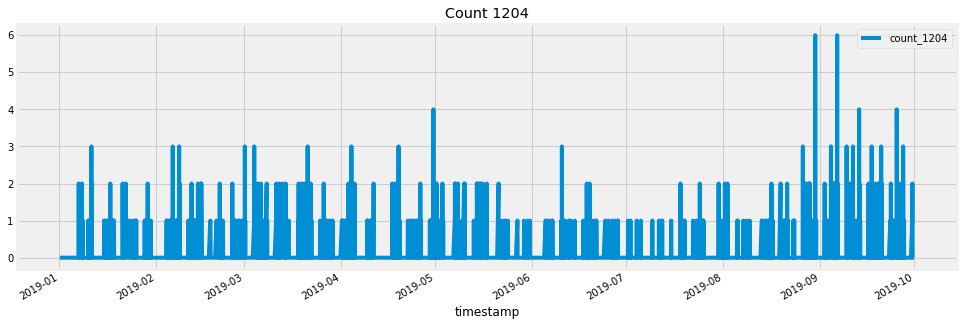

In [11]:
_ = data_1204[['count_1204']].plot(figsize=(15,5),title='Count 1204')

Trying to see the date of the 2 spikes 

In [12]:
index=data_1204.index[data_1204['count_1204']==6].tolist()
data_1204.loc[index, : ]

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,academic_calendar,weather_condition,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204
timestamp,,,,,,,,,,,,,,,,,,,
2019-08-30 08:00:00,6,8,3,8,242,30,35,NO,NO,WEEKDAY,NORMAL,NORMAL,2019/1,Mostly Cloudy,-1.693846,1.680915,1.499271,-1.752332,6
2019-09-06 08:00:00,6,8,3,9,249,6,36,NO,NO,WEEKDAY,NORMAL,NORMAL,2019/1,Light Rain,-1.325801,1.333421,-0.387007,0.107013,6


Maybe the rain and the time influenced the demand?

# Train-Test Split

- Experiment 1: 2019/1 as Testing set
- Experiment 2: September 2019 as Testing set

In [13]:
split_date_1 = '2019-08-12'
split_date_2 = '2019-08-31'

## Experiment 1: 2019/1 as Testing set

In [14]:
df_train_1 = data_1204.loc[data_1204.index <= split_date_1].copy()
df_test_1 = data_1204.loc[data_1204.index > split_date_1].copy()

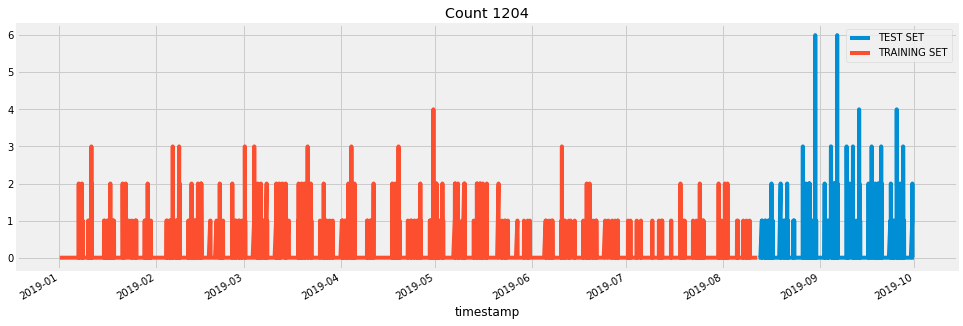

In [15]:
_ = df_test_1[['count_1204']] \
    .rename(columns={'count_1204': 'TEST SET'}) \
    .join(df_train_1[['count_1204']].rename(columns={'count_1204': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Count 1204')

## Experiment 2: September 2019 as Testing set

In [16]:
df_train_2 = data_1204.loc[data_1204.index <= split_date_2].copy()
df_test_2 = data_1204.loc[data_1204.index > split_date_2].copy()

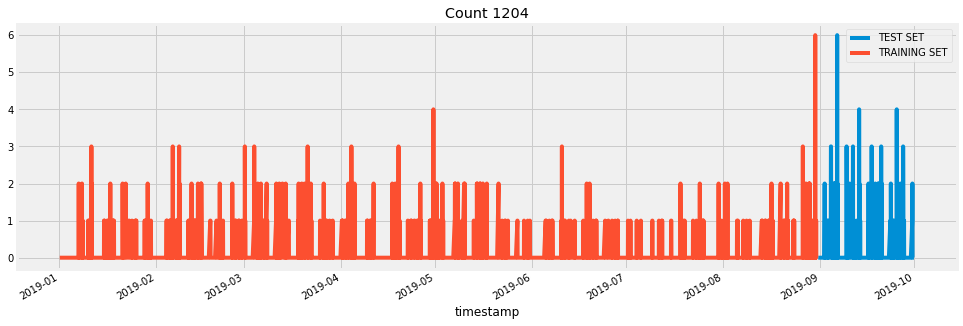

In [17]:
_ = df_test_2[['count_1204']] \
    .rename(columns={'count_1204': 'TEST SET'}) \
    .join(df_train_2[['count_1204']].rename(columns={'count_1204': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Count 1204')

In [18]:
df_train_1.head()

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,academic_calendar,weather_condition,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204
timestamp,,,,,,,,,,,,,,,,,,,
2019-01-01 07:00:00,3,7,1,1,1,1,1,NO,NO,WEEKDAY,HOLIDAY,NORMAL,HOLIDAY,Fair,-3.350046,0.568932,-0.656475,2.792734,0
2019-01-01 08:00:00,3,8,1,1,1,1,1,NO,NO,WEEKDAY,HOLIDAY,NORMAL,HOLIDAY,Fair,-3.350046,0.568932,-0.117539,3.102625,0
2019-01-01 09:00:00,3,9,1,1,1,1,1,NO,YES,WEEKDAY,HOLIDAY,NORMAL,HOLIDAY,Fair,-2.797979,0.290936,-0.387007,3.102625,0
2019-01-01 10:00:00,3,10,1,1,1,1,1,NO,YES,WEEKDAY,HOLIDAY,NORMAL,HOLIDAY,Fair,-2.429935,0.012940,-0.656475,3.102625,0
2019-01-01 11:00:00,3,11,1,1,1,1,1,NO,YES,WEEKDAY,HOLIDAY,NORMAL,HOLIDAY,Fair,-1.693846,-0.543052,-2.273285,3.102625,0


In [19]:
df_train_2.head()

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,academic_calendar,weather_condition,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204
timestamp,,,,,,,,,,,,,,,,,,,
2019-01-01 07:00:00,3,7,1,1,1,1,1,NO,NO,WEEKDAY,HOLIDAY,NORMAL,HOLIDAY,Fair,-3.350046,0.568932,-0.656475,2.792734,0
2019-01-01 08:00:00,3,8,1,1,1,1,1,NO,NO,WEEKDAY,HOLIDAY,NORMAL,HOLIDAY,Fair,-3.350046,0.568932,-0.117539,3.102625,0
2019-01-01 09:00:00,3,9,1,1,1,1,1,NO,YES,WEEKDAY,HOLIDAY,NORMAL,HOLIDAY,Fair,-2.797979,0.290936,-0.387007,3.102625,0
2019-01-01 10:00:00,3,10,1,1,1,1,1,NO,YES,WEEKDAY,HOLIDAY,NORMAL,HOLIDAY,Fair,-2.429935,0.012940,-0.656475,3.102625,0
2019-01-01 11:00:00,3,11,1,1,1,1,1,NO,YES,WEEKDAY,HOLIDAY,NORMAL,HOLIDAY,Fair,-1.693846,-0.543052,-2.273285,3.102625,0


# Preprocessing

## Generating dummy variables

In [20]:
def map_binary(df,column,map_value):
    df[column] = df[column].map(lambda x: map_value.get(x,x))

In [21]:
dummy_columns = ['academic_calendar','weather_condition']
binary_columns = ['is_lunch_break','is_class_time','is_weekday','is_Thai_holiday','is_exam_period']

- is_lunch_break (0 NO / 1 YES)
- is_class_time (0 NO / 1 YES)
- is_weekday (0 WEEKEND / 1 WEEKDAY)
- is_Thai_holiday (0 NO NORMAL / 1 YES HOLIDAY)
- is_exam_period (0 NO NORMAL / 1 YES EXAM)

In [22]:
map1 = {'YES': 1, 'NO': 0}
map2 = {'WEEKDAY': 1, 'WEEKEND': 0}
map3 = {'HOLIDAY': 1, 'NORMAL': 0}
map4 = {'EXAM': 1, 'NORMAL': 0}

In [23]:
map_binary(df_train_1,'is_lunch_break',map1)
map_binary(df_train_1,'is_class_time',map1)
map_binary(df_train_1,'is_weekday',map2)
map_binary(df_train_1,'is_Thai_holiday',map3)
map_binary(df_train_1,'is_exam_period',map4)
df_train_1.head()

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,academic_calendar,weather_condition,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204
timestamp,,,,,,,,,,,,,,,,,,,
2019-01-01 07:00:00,3,7,1,1,1,1,1,0,0,1,1,0,HOLIDAY,Fair,-3.350046,0.568932,-0.656475,2.792734,0
2019-01-01 08:00:00,3,8,1,1,1,1,1,0,0,1,1,0,HOLIDAY,Fair,-3.350046,0.568932,-0.117539,3.102625,0
2019-01-01 09:00:00,3,9,1,1,1,1,1,0,1,1,1,0,HOLIDAY,Fair,-2.797979,0.290936,-0.387007,3.102625,0
2019-01-01 10:00:00,3,10,1,1,1,1,1,0,1,1,1,0,HOLIDAY,Fair,-2.429935,0.012940,-0.656475,3.102625,0
2019-01-01 11:00:00,3,11,1,1,1,1,1,0,1,1,1,0,HOLIDAY,Fair,-1.693846,-0.543052,-2.273285,3.102625,0


In [24]:
map_binary(df_train_2,'is_lunch_break',map1)
map_binary(df_train_2,'is_class_time',map1)
map_binary(df_train_2,'is_weekday',map2)
map_binary(df_train_2,'is_Thai_holiday',map3)
map_binary(df_train_2,'is_exam_period',map4)
df_train_2.head()

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,academic_calendar,weather_condition,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204
timestamp,,,,,,,,,,,,,,,,,,,
2019-01-01 07:00:00,3,7,1,1,1,1,1,0,0,1,1,0,HOLIDAY,Fair,-3.350046,0.568932,-0.656475,2.792734,0
2019-01-01 08:00:00,3,8,1,1,1,1,1,0,0,1,1,0,HOLIDAY,Fair,-3.350046,0.568932,-0.117539,3.102625,0
2019-01-01 09:00:00,3,9,1,1,1,1,1,0,1,1,1,0,HOLIDAY,Fair,-2.797979,0.290936,-0.387007,3.102625,0
2019-01-01 10:00:00,3,10,1,1,1,1,1,0,1,1,1,0,HOLIDAY,Fair,-2.429935,0.012940,-0.656475,3.102625,0
2019-01-01 11:00:00,3,11,1,1,1,1,1,0,1,1,1,0,HOLIDAY,Fair,-1.693846,-0.543052,-2.273285,3.102625,0


In [25]:
map_binary(df_test_1,'is_lunch_break',map1)
map_binary(df_test_1,'is_class_time',map1)
map_binary(df_test_1,'is_weekday',map2)
map_binary(df_test_1,'is_Thai_holiday',map3)
map_binary(df_test_1,'is_exam_period',map4)
df_test_1.head()

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,academic_calendar,weather_condition,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204
timestamp,,,,,,,,,,,,,,,,,,,
2019-08-12 07:00:00,2,7,3,8,224,12,33,0,0,1,1,0,HOLIDAY,Partly Cloudy,-1.325801,1.680915,-2.273285,-0.822659,0
2019-08-12 08:00:00,2,8,3,8,224,12,33,0,0,1,1,0,HOLIDAY,Partly Cloudy,-0.773734,0.985926,-1.464880,-0.202878,0
2019-08-12 09:00:00,2,9,3,8,224,12,33,0,1,1,1,0,HOLIDAY,Fair,-0.405690,0.360435,0.151930,-0.202878,0
2019-08-12 10:00:00,2,10,3,8,224,12,33,0,1,1,1,0,HOLIDAY,Fair,-0.037645,0.360435,-0.117539,-0.202878,0
2019-08-12 11:00:00,2,11,3,8,224,12,33,0,1,1,1,0,HOLIDAY,Fair,0.330399,-0.195557,-0.117539,-0.202878,0


In [26]:
map_binary(df_test_2,'is_lunch_break',map1)
map_binary(df_test_2,'is_class_time',map1)
map_binary(df_test_2,'is_weekday',map2)
map_binary(df_test_2,'is_Thai_holiday',map3)
map_binary(df_test_2,'is_exam_period',map4)
df_test_2.head()

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,academic_calendar,weather_condition,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204
timestamp,,,,,,,,,,,,,,,,,,,
2019-08-31 07:00:00,7,7,3,8,243,31,35,0,0,0,0,0,2019/1,Fair,-1.325801,1.333421,-0.925944,-1.752332,0
2019-08-31 08:00:00,7,8,3,8,243,31,35,0,0,0,0,0,2019/1,Mostly Cloudy,-1.141779,1.333421,-0.387007,-1.442441,0
2019-08-31 09:00:00,7,9,3,8,243,31,35,0,1,0,0,0,2019/1,Partly Cloudy,-0.405690,0.638431,0.151930,-1.132550,0
2019-08-31 10:00:00,7,10,3,8,243,31,35,0,1,0,0,0,2019/1,Partly Cloudy,-0.405690,0.638431,0.151930,-1.132550,0
2019-08-31 11:00:00,7,11,3,8,243,31,35,0,1,0,0,0,2019/1,Partly Cloudy,-0.037645,0.082439,1.229803,-1.132550,0


**Generating dummy variables in all train and test sets for categorical features**

Currently we have 1 day with missing weather conditions in the training sets. We need to keep that in mind when we get dummy variables.

In [27]:
df_train_1[df_train_1.isnull().any(axis=1)]

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,academic_calendar,weather_condition,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204
timestamp,,,,,,,,,,,,,,,,,,,
2019-06-10 07:00:00,2,7,2,6,161,10,24,0,0,1,0,0,2018/SUMMER,NaN,NaN,NaN,NaN,NaN,0
2019-06-10 08:00:00,2,8,2,6,161,10,24,0,0,1,0,0,2018/SUMMER,NaN,NaN,NaN,NaN,NaN,1
2019-06-10 09:00:00,2,9,2,6,161,10,24,0,1,1,0,0,2018/SUMMER,NaN,NaN,NaN,NaN,NaN,0
2019-06-10 10:00:00,2,10,2,6,161,10,24,0,1,1,0,0,2018/SUMMER,NaN,NaN,NaN,NaN,NaN,0
2019-06-10 11:00:00,2,11,2,6,161,10,24,0,1,1,0,0,2018/SUMMER,NaN,NaN,NaN,NaN,NaN,0
2019-06-10 12:00:00,2,12,2,6,161,10,24,1,0,1,0,0,2018/SUMMER,NaN,NaN,NaN,NaN,NaN,3
2019-06-10 13:00:00,2,13,2,6,161,10,24,0,1,1,0,0,2018/SUMMER,NaN,NaN,NaN,NaN,NaN,0
2019-06-10 14:00:00,2,14,2,6,161,10,24,0,1,1,0,0,2018/SUMMER,NaN,NaN,NaN,NaN,NaN,0
2019-06-10 15:00:00,2,15,2,6,161,10,24,0,1,1,0,0,2018/SUMMER,NaN,NaN,NaN,NaN,NaN,0


In [28]:
def add_missing_columns(master_df,df):
    # Get missing columns in the master set
    missing_cols = set( master_df.columns ) - set( df.columns )
    # Add a missing column in the target set with default value equal to 0
    for column in missing_cols:
        df[column] = 0
    # Ensure the order of column in the master set is in the same order than in target set
    master_df, df = master_df.align(df, axis=1)

In [29]:
def bring_back_nan(master_df,df,column_name,prefix):
    df.loc[master_df[column_name].isnull(), df.columns.str.startswith(prefix)] = np.nan
    df.drop([prefix+"nan"],axis=1,inplace=True)

In [33]:
master_df = data_1204.copy()
temp_df_train_1 = df_train_1.copy()
temp_df_train_2 = df_train_2.copy()
temp_df_test_1 = df_test_1.copy()
temp_df_test_2 = df_test_2.copy()

In [34]:
master_df_dummies = pd.get_dummies(master_df, prefix=dummy_columns, columns=dummy_columns, dummy_na=True)
temp_df_train_1_dummies = pd.get_dummies(temp_df_train_1, prefix=dummy_columns, columns=dummy_columns, dummy_na=True)
temp_df_train_2_dummies = pd.get_dummies(temp_df_train_2, prefix=dummy_columns, columns=dummy_columns, dummy_na=True)
temp_df_test_1_dummies = pd.get_dummies(temp_df_test_1, prefix=dummy_columns, columns=dummy_columns, dummy_na=True)
temp_df_test_2_dummies = pd.get_dummies(temp_df_test_2, prefix=dummy_columns, columns=dummy_columns, dummy_na=True)

In [35]:
add_missing_columns(master_df_dummies,temp_df_train_1_dummies)
add_missing_columns(master_df_dummies,temp_df_train_2_dummies)
add_missing_columns(master_df_dummies,temp_df_test_1_dummies)
add_missing_columns(master_df_dummies,temp_df_test_2_dummies)

In [36]:
print(len(master_df_dummies.columns))
print(len(temp_df_train_1_dummies.columns))

48
48


In [37]:
bring_back_nan(master_df,temp_df_train_1_dummies,"weather_condition","weather_condition_")
bring_back_nan(master_df,temp_df_train_2_dummies,"weather_condition","weather_condition_")
bring_back_nan(master_df,temp_df_test_1_dummies,"weather_condition","weather_condition_")
bring_back_nan(master_df,temp_df_test_2_dummies,"weather_condition","weather_condition_")

In [38]:
def remove_col (df_list,col_name):
    for df in df_list:
        df.drop([col_name],axis=1,inplace=True)

In [39]:
remove_col([temp_df_train_1_dummies,temp_df_train_2_dummies,temp_df_test_1_dummies,temp_df_test_2_dummies],"academic_calendar_nan")

In [40]:
len(temp_df_train_1_dummies.columns)

46

In [41]:
temp_df_train_1_dummies[temp_df_train_1_dummies.isnull().any(axis=1)]

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204,academic_calendar_2018/2,academic_calendar_2018/SUMMER,academic_calendar_HOLIDAY,weather_condition_Cloudy,weather_condition_Fair,weather_condition_Fair / Windy,weather_condition_Fog,weather_condition_Haze,weather_condition_Heavy Rain,weather_condition_Heavy Rain / Windy,weather_condition_Heavy T-Storm,weather_condition_Heavy T-Storm / Windy,weather_condition_Light Rain,weather_condition_Light Rain Shower,weather_condition_Light Rain Shower / Windy,weather_condition_Light Rain with Thunder,weather_condition_Mostly Cloudy,weather_condition_Partly Cloudy,weather_condition_Partly Cloudy / Windy,weather_condition_Rain,weather_condition_Showers in the Vicinity,weather_condition_T-Storm,weather_condition_T-Storm / Windy,weather_condition_Thunder,weather_condition_Thunder in the Vicinity,academic_calendar_2019/1,weather_condition_Rain Shower,weather_condition_Rain / Windy,weather_condition_Mostly Cloudy / Windy
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-10 07:00:00,2,7,2,6,161,10,24,0,0,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 08:00:00,2,8,2,6,161,10,24,0,0,1,0,0,NaN,NaN,NaN,NaN,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 09:00:00,2,9,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 10:00:00,2,10,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 11:00:00,2,11,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 12:00:00,2,12,2,6,161,10,24,1,0,1,0,0,NaN,NaN,NaN,NaN,3,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 13:00:00,2,13,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 14:00:00,2,14,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 15:00:00,2,15,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


In [42]:
temp_df_train_2_dummies[temp_df_train_2_dummies.isnull().any(axis=1)]

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204,academic_calendar_2018/2,academic_calendar_2018/SUMMER,academic_calendar_2019/1,academic_calendar_HOLIDAY,weather_condition_Cloudy,weather_condition_Fair,weather_condition_Fair / Windy,weather_condition_Fog,weather_condition_Haze,weather_condition_Heavy Rain,weather_condition_Heavy Rain / Windy,weather_condition_Heavy T-Storm,weather_condition_Heavy T-Storm / Windy,weather_condition_Light Rain,weather_condition_Light Rain Shower,weather_condition_Light Rain Shower / Windy,weather_condition_Light Rain with Thunder,weather_condition_Mostly Cloudy,weather_condition_Partly Cloudy,weather_condition_Partly Cloudy / Windy,weather_condition_Rain,weather_condition_Rain Shower,weather_condition_Showers in the Vicinity,weather_condition_T-Storm,weather_condition_T-Storm / Windy,weather_condition_Thunder,weather_condition_Thunder in the Vicinity,weather_condition_Rain / Windy,weather_condition_Mostly Cloudy / Windy
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-10 07:00:00,2,7,2,6,161,10,24,0,0,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 08:00:00,2,8,2,6,161,10,24,0,0,1,0,0,NaN,NaN,NaN,NaN,1,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 09:00:00,2,9,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 10:00:00,2,10,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 11:00:00,2,11,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 12:00:00,2,12,2,6,161,10,24,1,0,1,0,0,NaN,NaN,NaN,NaN,3,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 13:00:00,2,13,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 14:00:00,2,14,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 15:00:00,2,15,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
temp_df_test_1_dummies[temp_df_test_1_dummies.isnull().any(axis=1)]

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204,academic_calendar_2019/1,academic_calendar_HOLIDAY,weather_condition_Fair,weather_condition_Fog,weather_condition_Haze,weather_condition_Light Rain,weather_condition_Light Rain Shower,weather_condition_Light Rain with Thunder,weather_condition_Mostly Cloudy,weather_condition_Mostly Cloudy / Windy,weather_condition_Partly Cloudy,weather_condition_Rain,weather_condition_Rain / Windy,weather_condition_Rain Shower,weather_condition_Showers in the Vicinity,weather_condition_T-Storm,weather_condition_Partly Cloudy / Windy,weather_condition_Heavy T-Storm,weather_condition_Cloudy,weather_condition_T-Storm / Windy,weather_condition_Thunder in the Vicinity,weather_condition_Heavy Rain / Windy,weather_condition_Light Rain Shower / Windy,weather_condition_Heavy Rain,weather_condition_Fair / Windy,academic_calendar_2018/SUMMER,weather_condition_Thunder,academic_calendar_2018/2,weather_condition_Heavy T-Storm / Windy
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [44]:
temp_df_test_2_dummies[temp_df_test_2_dummies.isnull().any(axis=1)]

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204,academic_calendar_2019/1,weather_condition_Fair,weather_condition_Fog,weather_condition_Haze,weather_condition_Light Rain,weather_condition_Light Rain Shower,weather_condition_Light Rain with Thunder,weather_condition_Mostly Cloudy,weather_condition_Mostly Cloudy / Windy,weather_condition_Partly Cloudy,weather_condition_Rain,weather_condition_Rain / Windy,weather_condition_Showers in the Vicinity,weather_condition_T-Storm,weather_condition_Partly Cloudy / Windy,weather_condition_Heavy T-Storm,weather_condition_Cloudy,academic_calendar_HOLIDAY,weather_condition_T-Storm / Windy,weather_condition_Thunder in the Vicinity,weather_condition_Heavy Rain / Windy,weather_condition_Rain Shower,weather_condition_Light Rain Shower / Windy,weather_condition_Heavy Rain,weather_condition_Fair / Windy,academic_calendar_2018/SUMMER,weather_condition_Thunder,academic_calendar_2018/2,weather_condition_Heavy T-Storm / Windy
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Now all variables are translated from categorical to numerical. Next we will fill the missing weather values.

In [45]:
df_train_1 = temp_df_train_1_dummies.copy()
df_train_2 = temp_df_train_2_dummies.copy()
df_test_1 = temp_df_test_1_dummies.copy()
df_test_2 = temp_df_test_2_dummies.copy()

## Fill missing weather data

In [46]:
df_train_1[df_train_1.isnull().any(axis=1)]

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204,academic_calendar_2018/2,academic_calendar_2018/SUMMER,academic_calendar_HOLIDAY,weather_condition_Cloudy,weather_condition_Fair,weather_condition_Fair / Windy,weather_condition_Fog,weather_condition_Haze,weather_condition_Heavy Rain,weather_condition_Heavy Rain / Windy,weather_condition_Heavy T-Storm,weather_condition_Heavy T-Storm / Windy,weather_condition_Light Rain,weather_condition_Light Rain Shower,weather_condition_Light Rain Shower / Windy,weather_condition_Light Rain with Thunder,weather_condition_Mostly Cloudy,weather_condition_Partly Cloudy,weather_condition_Partly Cloudy / Windy,weather_condition_Rain,weather_condition_Showers in the Vicinity,weather_condition_T-Storm,weather_condition_T-Storm / Windy,weather_condition_Thunder,weather_condition_Thunder in the Vicinity,academic_calendar_2019/1,weather_condition_Rain Shower,weather_condition_Rain / Windy,weather_condition_Mostly Cloudy / Windy
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-10 07:00:00,2,7,2,6,161,10,24,0,0,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 08:00:00,2,8,2,6,161,10,24,0,0,1,0,0,NaN,NaN,NaN,NaN,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 09:00:00,2,9,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 10:00:00,2,10,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 11:00:00,2,11,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 12:00:00,2,12,2,6,161,10,24,1,0,1,0,0,NaN,NaN,NaN,NaN,3,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 13:00:00,2,13,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 14:00:00,2,14,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 15:00:00,2,15,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


In [47]:
df_train_2[df_train_2.isnull().any(axis=1)]

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204,academic_calendar_2018/2,academic_calendar_2018/SUMMER,academic_calendar_2019/1,academic_calendar_HOLIDAY,weather_condition_Cloudy,weather_condition_Fair,weather_condition_Fair / Windy,weather_condition_Fog,weather_condition_Haze,weather_condition_Heavy Rain,weather_condition_Heavy Rain / Windy,weather_condition_Heavy T-Storm,weather_condition_Heavy T-Storm / Windy,weather_condition_Light Rain,weather_condition_Light Rain Shower,weather_condition_Light Rain Shower / Windy,weather_condition_Light Rain with Thunder,weather_condition_Mostly Cloudy,weather_condition_Partly Cloudy,weather_condition_Partly Cloudy / Windy,weather_condition_Rain,weather_condition_Rain Shower,weather_condition_Showers in the Vicinity,weather_condition_T-Storm,weather_condition_T-Storm / Windy,weather_condition_Thunder,weather_condition_Thunder in the Vicinity,weather_condition_Rain / Windy,weather_condition_Mostly Cloudy / Windy
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-10 07:00:00,2,7,2,6,161,10,24,0,0,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 08:00:00,2,8,2,6,161,10,24,0,0,1,0,0,NaN,NaN,NaN,NaN,1,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 09:00:00,2,9,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 10:00:00,2,10,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 11:00:00,2,11,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 12:00:00,2,12,2,6,161,10,24,1,0,1,0,0,NaN,NaN,NaN,NaN,3,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 13:00:00,2,13,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 14:00:00,2,14,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 15:00:00,2,15,2,6,161,10,24,0,1,1,0,0,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df_test_1[df_test_1.isnull().any(axis=1)]

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204,academic_calendar_2019/1,academic_calendar_HOLIDAY,weather_condition_Fair,weather_condition_Fog,weather_condition_Haze,weather_condition_Light Rain,weather_condition_Light Rain Shower,weather_condition_Light Rain with Thunder,weather_condition_Mostly Cloudy,weather_condition_Mostly Cloudy / Windy,weather_condition_Partly Cloudy,weather_condition_Rain,weather_condition_Rain / Windy,weather_condition_Rain Shower,weather_condition_Showers in the Vicinity,weather_condition_T-Storm,weather_condition_Partly Cloudy / Windy,weather_condition_Heavy T-Storm,weather_condition_Cloudy,weather_condition_T-Storm / Windy,weather_condition_Thunder in the Vicinity,weather_condition_Heavy Rain / Windy,weather_condition_Light Rain Shower / Windy,weather_condition_Heavy Rain,weather_condition_Fair / Windy,academic_calendar_2018/SUMMER,weather_condition_Thunder,academic_calendar_2018/2,weather_condition_Heavy T-Storm / Windy
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [49]:
df_test_2[df_test_2.isnull().any(axis=1)]

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204,academic_calendar_2019/1,weather_condition_Fair,weather_condition_Fog,weather_condition_Haze,weather_condition_Light Rain,weather_condition_Light Rain Shower,weather_condition_Light Rain with Thunder,weather_condition_Mostly Cloudy,weather_condition_Mostly Cloudy / Windy,weather_condition_Partly Cloudy,weather_condition_Rain,weather_condition_Rain / Windy,weather_condition_Showers in the Vicinity,weather_condition_T-Storm,weather_condition_Partly Cloudy / Windy,weather_condition_Heavy T-Storm,weather_condition_Cloudy,academic_calendar_HOLIDAY,weather_condition_T-Storm / Windy,weather_condition_Thunder in the Vicinity,weather_condition_Heavy Rain / Windy,weather_condition_Rain Shower,weather_condition_Light Rain Shower / Windy,weather_condition_Heavy Rain,weather_condition_Fair / Windy,academic_calendar_2018/SUMMER,weather_condition_Thunder,academic_calendar_2018/2,weather_condition_Heavy T-Storm / Windy
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


So we are missing data from both training sets.
Filling missing numerical value with mean and missing categorical value with mode

**Imputing missing numerical weather data**

In [50]:
df_train_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
date_of_week,3122.0,4.008969,2.000300,1.000000,2.000000,4.000000,6.000000,7.000000
hour,3122.0,13.500000,4.031775,7.000000,10.000000,13.500000,17.000000,20.000000
quarter_of_year,3122.0,1.784753,0.738764,1.000000,1.000000,2.000000,2.000000,3.000000
month,3122.0,4.215247,2.136585,1.000000,2.000000,4.000000,6.000000,8.000000
day_of_year,3122.0,112.000000,64.384220,1.000000,56.000000,112.000000,168.000000,223.000000
day_of_month,3122.0,15.183857,8.829991,1.000000,7.000000,15.000000,23.000000,31.000000
week_of_year,3122.0,16.569507,9.196586,1.000000,9.000000,17.000000,25.000000,32.000000
is_lunch_break,3122.0,0.071429,0.257581,0.000000,0.000000,0.000000,0.000000,1.000000
is_class_time,3122.0,0.428571,0.494951,0.000000,0.000000,0.000000,1.000000,1.000000
is_weekday,3122.0,0.713004,0.452432,0.000000,0.000000,1.000000,1.000000,1.000000


In [51]:
df_train_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
date_of_week,3388.0,4.008264,1.989919,1.000000,2.000000,4.000000,6.000000,7.000000
hour,3388.0,13.500000,4.031724,7.000000,10.000000,13.500000,17.000000,20.000000
quarter_of_year,3388.0,1.880165,0.780888,1.000000,1.000000,2.000000,3.000000,3.000000
month,3388.0,4.512397,2.289788,1.000000,3.000000,5.000000,7.000000,8.000000
day_of_year,3388.0,121.500000,69.869098,1.000000,61.000000,121.500000,182.000000,242.000000
day_of_month,3388.0,15.640496,8.754975,1.000000,8.000000,16.000000,23.000000,31.000000
week_of_year,3388.0,17.929752,9.985305,1.000000,9.000000,18.000000,27.000000,35.000000
is_lunch_break,3388.0,0.071429,0.257577,0.000000,0.000000,0.000000,0.000000,1.000000
is_class_time,3388.0,0.428571,0.494945,0.000000,0.000000,0.000000,1.000000,1.000000
is_weekday,3388.0,0.719008,0.449550,0.000000,0.000000,1.000000,1.000000,1.000000


In [52]:
def fill_na_with_mean(df,column_list):
    for column in column_list:
        df[column].fillna(df[column].mean(),inplace=True)

In [53]:
na_num_columns = ['temperature_normalized','humidity_normalized','wind_speed_normalized','pressure_normalized']

In [54]:
fill_na_with_mean(df_train_1,na_num_columns)
fill_na_with_mean(df_train_2,na_num_columns)

In [55]:
df_train_1[df_train_1.isnull().any(axis=1)]

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204,academic_calendar_2018/2,academic_calendar_2018/SUMMER,academic_calendar_HOLIDAY,weather_condition_Cloudy,weather_condition_Fair,weather_condition_Fair / Windy,weather_condition_Fog,weather_condition_Haze,weather_condition_Heavy Rain,weather_condition_Heavy Rain / Windy,weather_condition_Heavy T-Storm,weather_condition_Heavy T-Storm / Windy,weather_condition_Light Rain,weather_condition_Light Rain Shower,weather_condition_Light Rain Shower / Windy,weather_condition_Light Rain with Thunder,weather_condition_Mostly Cloudy,weather_condition_Partly Cloudy,weather_condition_Partly Cloudy / Windy,weather_condition_Rain,weather_condition_Showers in the Vicinity,weather_condition_T-Storm,weather_condition_T-Storm / Windy,weather_condition_Thunder,weather_condition_Thunder in the Vicinity,academic_calendar_2019/1,weather_condition_Rain Shower,weather_condition_Rain / Windy,weather_condition_Mostly Cloudy / Windy
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-10 07:00:00,2,7,2,6,161,10,24,0,0,1,0,0,0.081898,-0.098822,0.001763,0.043101,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 08:00:00,2,8,2,6,161,10,24,0,0,1,0,0,0.081898,-0.098822,0.001763,0.043101,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 09:00:00,2,9,2,6,161,10,24,0,1,1,0,0,0.081898,-0.098822,0.001763,0.043101,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 10:00:00,2,10,2,6,161,10,24,0,1,1,0,0,0.081898,-0.098822,0.001763,0.043101,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 11:00:00,2,11,2,6,161,10,24,0,1,1,0,0,0.081898,-0.098822,0.001763,0.043101,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 12:00:00,2,12,2,6,161,10,24,1,0,1,0,0,0.081898,-0.098822,0.001763,0.043101,3,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 13:00:00,2,13,2,6,161,10,24,0,1,1,0,0,0.081898,-0.098822,0.001763,0.043101,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 14:00:00,2,14,2,6,161,10,24,0,1,1,0,0,0.081898,-0.098822,0.001763,0.043101,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-06-10 15:00:00,2,15,2,6,161,10,24,0,1,1,0,0,0.081898,-0.098822,0.001763,0.043101,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


In [56]:
df_train_1.head()

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204,academic_calendar_2018/2,academic_calendar_2018/SUMMER,academic_calendar_HOLIDAY,weather_condition_Cloudy,weather_condition_Fair,weather_condition_Fair / Windy,weather_condition_Fog,weather_condition_Haze,weather_condition_Heavy Rain,weather_condition_Heavy Rain / Windy,weather_condition_Heavy T-Storm,weather_condition_Heavy T-Storm / Windy,weather_condition_Light Rain,weather_condition_Light Rain Shower,weather_condition_Light Rain Shower / Windy,weather_condition_Light Rain with Thunder,weather_condition_Mostly Cloudy,weather_condition_Partly Cloudy,weather_condition_Partly Cloudy / Windy,weather_condition_Rain,weather_condition_Showers in the Vicinity,weather_condition_T-Storm,weather_condition_T-Storm / Windy,weather_condition_Thunder,weather_condition_Thunder in the Vicinity,academic_calendar_2019/1,weather_condition_Rain Shower,weather_condition_Rain / Windy,weather_condition_Mostly Cloudy / Windy
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 07:00:00,3,7,1,1,1,1,1,0,0,1,1,0,-3.350046,0.568932,-0.656475,2.792734,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2019-01-01 08:00:00,3,8,1,1,1,1,1,0,0,1,1,0,-3.350046,0.568932,-0.117539,3.102625,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2019-01-01 09:00:00,3,9,1,1,1,1,1,0,1,1,1,0,-2.797979,0.290936,-0.387007,3.102625,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2019-01-01 10:00:00,3,10,1,1,1,1,1,0,1,1,1,0,-2.429935,0.012940,-0.656475,3.102625,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2019-01-01 11:00:00,3,11,1,1,1,1,1,0,1,1,1,0,-1.693846,-0.543052,-2.273285,3.102625,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0


In [57]:
df_train_2[df_train_2.isnull().any(axis=1)]

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204,academic_calendar_2018/2,academic_calendar_2018/SUMMER,academic_calendar_2019/1,academic_calendar_HOLIDAY,weather_condition_Cloudy,weather_condition_Fair,weather_condition_Fair / Windy,weather_condition_Fog,weather_condition_Haze,weather_condition_Heavy Rain,weather_condition_Heavy Rain / Windy,weather_condition_Heavy T-Storm,weather_condition_Heavy T-Storm / Windy,weather_condition_Light Rain,weather_condition_Light Rain Shower,weather_condition_Light Rain Shower / Windy,weather_condition_Light Rain with Thunder,weather_condition_Mostly Cloudy,weather_condition_Partly Cloudy,weather_condition_Partly Cloudy / Windy,weather_condition_Rain,weather_condition_Rain Shower,weather_condition_Showers in the Vicinity,weather_condition_T-Storm,weather_condition_T-Storm / Windy,weather_condition_Thunder,weather_condition_Thunder in the Vicinity,weather_condition_Rain / Windy,weather_condition_Mostly Cloudy / Windy
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-10 07:00:00,2,7,2,6,161,10,24,0,0,1,0,0,0.055893,-0.063769,0.029096,-0.010061,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 08:00:00,2,8,2,6,161,10,24,0,0,1,0,0,0.055893,-0.063769,0.029096,-0.010061,1,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 09:00:00,2,9,2,6,161,10,24,0,1,1,0,0,0.055893,-0.063769,0.029096,-0.010061,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 10:00:00,2,10,2,6,161,10,24,0,1,1,0,0,0.055893,-0.063769,0.029096,-0.010061,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 11:00:00,2,11,2,6,161,10,24,0,1,1,0,0,0.055893,-0.063769,0.029096,-0.010061,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 12:00:00,2,12,2,6,161,10,24,1,0,1,0,0,0.055893,-0.063769,0.029096,-0.010061,3,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 13:00:00,2,13,2,6,161,10,24,0,1,1,0,0,0.055893,-0.063769,0.029096,-0.010061,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 14:00:00,2,14,2,6,161,10,24,0,1,1,0,0,0.055893,-0.063769,0.029096,-0.010061,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10 15:00:00,2,15,2,6,161,10,24,0,1,1,0,0,0.055893,-0.063769,0.029096,-0.010061,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df_train_2.head()

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204,academic_calendar_2018/2,academic_calendar_2018/SUMMER,academic_calendar_2019/1,academic_calendar_HOLIDAY,weather_condition_Cloudy,weather_condition_Fair,weather_condition_Fair / Windy,weather_condition_Fog,weather_condition_Haze,weather_condition_Heavy Rain,weather_condition_Heavy Rain / Windy,weather_condition_Heavy T-Storm,weather_condition_Heavy T-Storm / Windy,weather_condition_Light Rain,weather_condition_Light Rain Shower,weather_condition_Light Rain Shower / Windy,weather_condition_Light Rain with Thunder,weather_condition_Mostly Cloudy,weather_condition_Partly Cloudy,weather_condition_Partly Cloudy / Windy,weather_condition_Rain,weather_condition_Rain Shower,weather_condition_Showers in the Vicinity,weather_condition_T-Storm,weather_condition_T-Storm / Windy,weather_condition_Thunder,weather_condition_Thunder in the Vicinity,weather_condition_Rain / Windy,weather_condition_Mostly Cloudy / Windy
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 07:00:00,3,7,1,1,1,1,1,0,0,1,1,0,-3.350046,0.568932,-0.656475,2.792734,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 08:00:00,3,8,1,1,1,1,1,0,0,1,1,0,-3.350046,0.568932,-0.117539,3.102625,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 09:00:00,3,9,1,1,1,1,1,0,1,1,1,0,-2.797979,0.290936,-0.387007,3.102625,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 10:00:00,3,10,1,1,1,1,1,0,1,1,1,0,-2.429935,0.012940,-0.656475,3.102625,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 11:00:00,3,11,1,1,1,1,1,0,1,1,1,0,-1.693846,-0.543052,-2.273285,3.102625,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Filling missing weather conditions with mode**

In [59]:
print (temp_df_train_1['weather_condition'].mode()[0])
print (b['weather_condition'].mode()[0])

Fair
Fair


In [60]:
other_weather_col = ['weather_condition_Cloudy', 'weather_condition_Fair / Windy',
       'weather_condition_Fog', 'weather_condition_Haze',
       'weather_condition_Heavy Rain', 'weather_condition_Heavy Rain / Windy',
       'weather_condition_Heavy T-Storm',
       'weather_condition_Heavy T-Storm / Windy',
       'weather_condition_Light Rain', 'weather_condition_Light Rain Shower',
       'weather_condition_Light Rain Shower / Windy',
       'weather_condition_Light Rain with Thunder',
       'weather_condition_Mostly Cloudy', 'weather_condition_Partly Cloudy',
       'weather_condition_Partly Cloudy / Windy', 'weather_condition_Rain',
       'weather_condition_Showers in the Vicinity',
       'weather_condition_T-Storm', 'weather_condition_T-Storm / Windy',
       'weather_condition_Thunder',
       'weather_condition_Thunder in the Vicinity',
       'weather_condition_Rain Shower', 'weather_condition_Rain / Windy',
       'weather_condition_Mostly Cloudy / Windy']

In [61]:
index_train_1 = df_train_1[df_train_1.isnull().any(axis=1)].index
index_train_2 = df_train_2[df_train_2.isnull().any(axis=1)].index

In [62]:
df_train_1.loc[index_train_1.values,other_weather_col] = 0
df_train_1.loc[index_train_1.values,'weather_condition_Fair'] = 1
df_train_2.loc[index_train_2.values,other_weather_col] = 0
df_train_2.loc[index_train_2.values,'weather_condition_Fair'] = 1

In [63]:
df_train_1[df_train_1.isnull().any(axis=1)]

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204,academic_calendar_2018/2,academic_calendar_2018/SUMMER,academic_calendar_HOLIDAY,weather_condition_Cloudy,weather_condition_Fair,weather_condition_Fair / Windy,weather_condition_Fog,weather_condition_Haze,weather_condition_Heavy Rain,weather_condition_Heavy Rain / Windy,weather_condition_Heavy T-Storm,weather_condition_Heavy T-Storm / Windy,weather_condition_Light Rain,weather_condition_Light Rain Shower,weather_condition_Light Rain Shower / Windy,weather_condition_Light Rain with Thunder,weather_condition_Mostly Cloudy,weather_condition_Partly Cloudy,weather_condition_Partly Cloudy / Windy,weather_condition_Rain,weather_condition_Showers in the Vicinity,weather_condition_T-Storm,weather_condition_T-Storm / Windy,weather_condition_Thunder,weather_condition_Thunder in the Vicinity,academic_calendar_2019/1,weather_condition_Rain Shower,weather_condition_Rain / Windy,weather_condition_Mostly Cloudy / Windy
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [64]:
df_train_2[df_train_2.isnull().any(axis=1)]

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,is_lunch_break,is_class_time,is_weekday,is_Thai_holiday,is_exam_period,temperature_normalized,humidity_normalized,wind_speed_normalized,pressure_normalized,count_1204,academic_calendar_2018/2,academic_calendar_2018/SUMMER,academic_calendar_2019/1,academic_calendar_HOLIDAY,weather_condition_Cloudy,weather_condition_Fair,weather_condition_Fair / Windy,weather_condition_Fog,weather_condition_Haze,weather_condition_Heavy Rain,weather_condition_Heavy Rain / Windy,weather_condition_Heavy T-Storm,weather_condition_Heavy T-Storm / Windy,weather_condition_Light Rain,weather_condition_Light Rain Shower,weather_condition_Light Rain Shower / Windy,weather_condition_Light Rain with Thunder,weather_condition_Mostly Cloudy,weather_condition_Partly Cloudy,weather_condition_Partly Cloudy / Windy,weather_condition_Rain,weather_condition_Rain Shower,weather_condition_Showers in the Vicinity,weather_condition_T-Storm,weather_condition_T-Storm / Windy,weather_condition_Thunder,weather_condition_Thunder in the Vicinity,weather_condition_Rain / Windy,weather_condition_Mostly Cloudy / Windy
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [65]:
print(len(df_train_1.columns))
print(len(df_train_2.columns))
print(len(master_df_dummies.columns)) #this one has academic_calendar_nan and weather_condition_nan

46
46
48


Remove trap dummy variables: academic_calendar_HOLIDAY and weather_condition_Cloudy

In [66]:
remove_col([df_train_1, df_train_2, df_test_1, df_test_2],"academic_calendar_HOLIDAY")
remove_col([df_train_1, df_train_2, df_test_1, df_test_2],"weather_condition_Cloudy")

No missing values left. All data is correctly imputed.

## Splitting training and cv -- experiment 1

In [67]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

model = xgb.XGBRegressor()
tscv = TimeSeriesSplit(n_splits=5)

In [68]:
X_train = df_train_1.drop(['count_1204'],axis=1)
y_train = df_train_1[['count_1204']]
X_test = df_test_1.drop(['count_1204'],axis=1)
y_test = df_test_1[['count_1204']]

In [69]:
y_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
count_1204,3122.0,0.13581,0.419188,0.0,0.0,0.0,0.0,4.0


In [70]:
y_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
count_1204,700.0,0.255714,0.673669,0.0,0.0,0.0,0.0,6.0


## Grid Search

In [71]:
# param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:squarederror'],
#               'learning_rate': [0.1], #so called `eta` value
#               'max_depth': range(3,10,1),
#               'min_child_weight': range(1,12,2),
#               'silent': [1],
#               'subsample': [i/10.0 for i in range(6,10)],
#               'colsample_bytree': [i/10.0 for i in range(6,10)],
#               'n_estimators': [500],
#                  }

In [72]:
# gsearch = GridSearchCV(estimator=model, cv=tscv,
#                         param_grid=param_grid)
# gsearch.fit(X_train, y_train)

In [73]:
# print('best params')
# print (gsearch.best_params_)
# print('best score')
# print (gsearch.best_score_)

## Modeling with best parameters

In [74]:
X_train1 = X_train.copy()
X_test1 = X_test.copy()
X_test1 = X_test1[X_train1.columns]

In [75]:
#xgb_model = xgb.XGBRegressor(**gsearch.best_params_)

NameError: name 'gsearch' is not defined

In [95]:
xgb_model = xgb.XGBRegressor(
base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0,
       importance_type='gain', learning_rate=0.01, max_delta_step=0,
       max_depth=9, min_child_weight=3, missing=None, n_estimators=500,
       n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.9, verbosity=1)

In [96]:
#gsearch.best_params_

In [97]:
xgb_model.fit(X_train, y_train,
        eval_set=[(X_train1, y_train), (X_test1, y_test)],
        early_stopping_rounds=50,
       verbose=True)

[0]	validation_0-rmse:0.551559	validation_1-rmse:0.714561
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.547698	validation_1-rmse:0.712998
[2]	validation_0-rmse:0.544157	validation_1-rmse:0.711523
[3]	validation_0-rmse:0.540351	validation_1-rmse:0.709991
[4]	validation_0-rmse:0.5367	validation_1-rmse:0.708266
[5]	validation_0-rmse:0.533067	validation_1-rmse:0.706545
[6]	validation_0-rmse:0.529632	validation_1-rmse:0.704982
[7]	validation_0-rmse:0.526362	validation_1-rmse:0.703572
[8]	validation_0-rmse:0.523008	validation_1-rmse:0.702292
[9]	validation_0-rmse:0.519762	validation_1-rmse:0.701102
[10]	validation_0-rmse:0.516152	validation_1-rmse:0.699757
[11]	validation_0-rmse:0.512487	validation_1-rmse:0.69832
[12]	validation_0-rmse:0.50895	validation_1-rmse:0.696904
[13]	validation_0-rmse:0.505517	validation_1-rmse:0.695512
[14]	validation_0-rmse:0.5024

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0,
       importance_type='gain', learning_rate=0.01, max_delta_step=0,
       max_depth=9, min_child_weight=3, missing=None, n_estimators=500,
       n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.9, verbosity=1)

In [98]:
X_train1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
date_of_week,3122.0,4.008969,2.000300,1.000000,2.000000,4.000000,6.000000,7.000000
hour,3122.0,13.500000,4.031775,7.000000,10.000000,13.500000,17.000000,20.000000
quarter_of_year,3122.0,1.784753,0.738764,1.000000,1.000000,2.000000,2.000000,3.000000
month,3122.0,4.215247,2.136585,1.000000,2.000000,4.000000,6.000000,8.000000
day_of_year,3122.0,112.000000,64.384220,1.000000,56.000000,112.000000,168.000000,223.000000
day_of_month,3122.0,15.183857,8.829991,1.000000,7.000000,15.000000,23.000000,31.000000
week_of_year,3122.0,16.569507,9.196586,1.000000,9.000000,17.000000,25.000000,32.000000
is_lunch_break,3122.0,0.071429,0.257581,0.000000,0.000000,0.000000,0.000000,1.000000
is_class_time,3122.0,0.428571,0.494951,0.000000,0.000000,0.000000,1.000000,1.000000
is_weekday,3122.0,0.713004,0.452432,0.000000,0.000000,1.000000,1.000000,1.000000


## Feature Importance

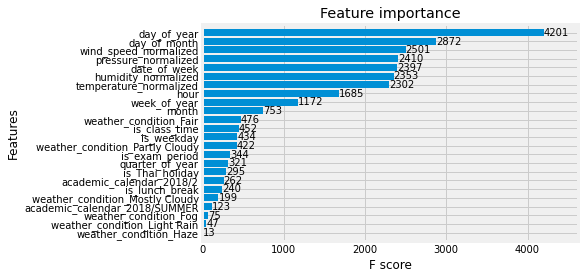

In [99]:
_ = plot_importance(xgb_model, height=0.8)

## Forecast on Test Set

In [100]:
df_test_1['count_1204_prediction'] = xgb_model.predict(X_test1)
df_all = pd.concat([df_test_1, df_train_1], sort=False)

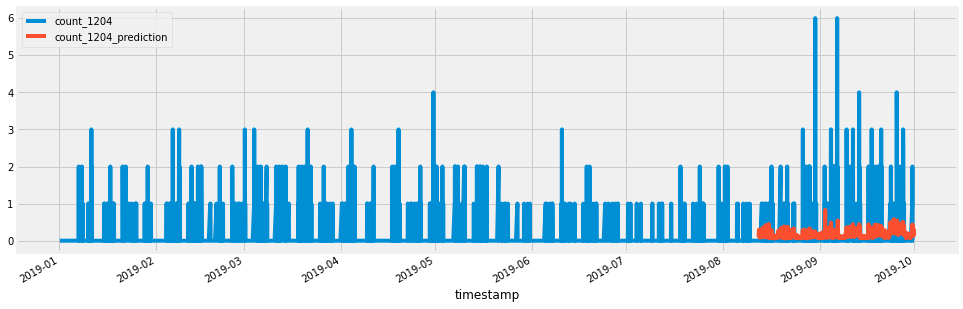

In [101]:
_ = df_all[['count_1204','count_1204_prediction']].plot(figsize=(15, 5))

## Evaluation

In [102]:
from sklearn.metrics import r2_score

In [104]:
exp1_rmse = np.sqrt(mean_squared_error(y_true=df_test_1['count_1204'],
                   y_pred=df_test_1['count_1204_prediction']))
exp1_mae = mean_absolute_error(y_true=df_test_1['count_1204'],
                   y_pred=df_test_1['count_1204_prediction'])
exp1_r2 = r2_score(y_true=df_test_1['count_1204'],
                   y_pred=df_test_1['count_1204_prediction'])
print ("Experiment 1 RMSE: {}".format(exp1_rmse))
print ("Experiment 1 MAE: {}".format(exp1_mae))
print ("Experiment 1 R^2: {}".format(exp1_r2))

Experiment 1 RMSE: 0.6480307325404405
Experiment 1 MAE: 0.34058488999094283
Experiment 1 R^2: 0.07334322474981436


### Try rounding up and reevaluate

In [ ]:
# import math
# def round_up(threshold,df,column_name):
#     yhat_round = []
#     for each in df[column_name]:
#         if ((each*10)%10 >= threshold):
#             each = math.ceil(each)
#         else:
#             each = math.floor(each)    
#         yhat_round.append(each)
#     df[column_name+'_round_up_{}'.format(threshold)] = yhat_round

In [ ]:
# yhat_round = []
# for each in df_test['count_1204_prediction']:
#     if ((each*10)%10 >= 6):
#         each = math.ceil(each)
#     else:
#         each = math.floor(each)    
#     yhat_round.append(each)
# df_test['count_1204_prediction_round_up_6'] = yhat_round

In [ ]:
# round_up(6,df_test,'count_1204_prediction')
# df_test.head()

In [ ]:
# df_test_1.describe().transpose()